<a href="https://colab.research.google.com/github/alexacondori/ALURA_INMERSION_DE_DATOS/blob/main/ALURA_INMERSION_DATOS_TERCERA_CLASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TERCER CLASE ALURA

In [5]:
#para conectar colab con mi drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
#importamos la base de datos del drive
inmuebles = pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/inmuebles_bogota.csv')
#nos muestra los 5 primeras filas
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
columnas = {'Baños':'Banos','Área':'Area'} #creamos un diccionario
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.Valor[0].split()
inmuebles.Valor.str.split()
inmuebles.Valor.str.split(expand=True)
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0] #atributo 1
inmuebles['Precio'] = valor[1] #atributo 2
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles[['Precio','Barrio']]
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

In [7]:
#Creamos una nueva variable para saber el precio de cada inmueble por area
inmuebles['Valor_m2_Millon']=inmuebles['Precio_Millon']/inmuebles['Area']
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.0,5.142857
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.0,3.941176
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.0,7.777778
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.0,5.779221
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.0,7.578125


In [8]:
#Hallamos el promedio de precio de m2 de cada barrio
inmuebles.groupby('Barrio').mean()

<ipython-input-8-c61e13dba34b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inmuebles.groupby('Barrio').mean()


,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3.000000,2.000000,97.000000,580.000000,5.979381
Alhambra,3.000000,2.941176,190.411765,752.352941,4.326836
Andes Norte,3.000000,2.857143,124.857143,709.571429,6.050350
Antonio Nariño,4.312500,2.500000,163.062500,459.221875,3.530638
Barrancas,2.866667,2.133333,70.200000,314.133333,4.415957
...,...,...,...,...,...
Villa Maria,4.692308,3.692308,207.153846,402.846154,2.044511
Villas De Granada,3.454545,2.318182,86.590909,282.301136,3.168840
Villemar,2.944444,2.055556,76.888889,303.833333,3.989697


In [9]:
#hallamos el valor especifico para cada barrio
datos_barrio=inmuebles.groupby('Barrio').sum()
datos_barrio

<ipython-input-9-91b9df7ce31f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_barrio=inmuebles.groupby('Barrio').sum()


,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon
Barrio,,,,,
Alameda,3,2,97,580.000000,5.979381
Alhambra,51,50,3237,12790.000000,73.556204
Andes Norte,21,20,874,4967.000000,42.352453
Antonio Nariño,207,120,7827,22042.650000,169.470608
Barrancas,43,32,1053,4712.000000,66.239361
...,...,...,...,...,...
Villa Maria,61,48,2693,5237.000000,26.578643
Villas De Granada,76,51,1905,6210.625000,69.714480
Villemar,53,37,1384,5469.000000,71.814550


In [10]:
#creamos un nuevo atributo
datos_barrio['Valor_m2_Barrio']=datos_barrio['Precio_Millon']/datos_barrio['Area']
datos_barrio

,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
Barrio,,,,,,
Alameda,3,2,97,580.000000,5.979381,5.979381
Alhambra,51,50,3237,12790.000000,73.556204,3.951189
Andes Norte,21,20,874,4967.000000,42.352453,5.683066
Antonio Nariño,207,120,7827,22042.650000,169.470608,2.816232
Barrancas,43,32,1053,4712.000000,66.239361,4.474834
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.000000,26.578643,1.944671
Villas De Granada,76,51,1905,6210.625000,69.714480,3.260171
Villemar,53,37,1384,5469.000000,71.814550,3.951590


In [11]:
#almacenamos en un diccionario de lo hallado
m2_barrio=dict(datos_barrio['Valor_m2_Barrio'])

In [12]:
#llevamos a la data inicial
inmuebles['Valor_m2_Barrio']=inmuebles['Barrio']
inmuebles['Valor_m2_Barrio']=inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.0,5.142857,4.572009
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.0,3.941176,3.403589
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.0,7.777778,8.104487
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.0,5.779221,5.655581
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.0,7.578125,6.290551


In [13]:
#elegimos los barrios con mas venta
top_barrios=inmuebles['Barrio'].value_counts()[:10].index
top_barrios

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object')

In [14]:

datos_barrio.reset_index(inplace=True)
datos_barrio

,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Alameda,3,2,97,580.000000,5.979381,5.979381
1,Alhambra,51,50,3237,12790.000000,73.556204,3.951189
2,Andes Norte,21,20,874,4967.000000,42.352453,5.683066
3,Antonio Nariño,207,120,7827,22042.650000,169.470608,2.816232
4,Barrancas,43,32,1053,4712.000000,66.239361,4.474834
...,...,...,...,...,...,...,...
144,Villa Maria,61,48,2693,5237.000000,26.578643,1.944671
145,Villas De Granada,76,51,1905,6210.625000,69.714480,3.260171
146,Villemar,53,37,1384,5469.000000,71.814550,3.951590
147,Zona Franca,2,1,54,160.000000,2.962963,2.962963


In [15]:
#para hacer referencia a la data
datos_barrio.query('Barrio in @top_barrios')

,Barrio,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
5,Barrios Unidos,1525,1196,87799,259877.762703,2070.607702,2.959917
10,Bosa,1743,789,34879,93400.560494,1654.362584,2.677845
22,Cedritos,1458,1348,53711,270027.733421,2853.228070,5.027420
24,Chapinero,892,913,81248,372130.933118,2466.034512,4.580186
50,Engativa,1676,1077,59808,172711.728232,1795.707672,2.887770
63,Kennedy,2151,1233,61475,207963.648911,2127.656341,3.382898
125,Santa Barbara,1073,1162,54693,320097.803000,2701.875380,5.852628
132,Suba,1497,1202,61615,266406.040022,2000.720820,4.323721
138,Usaquén,3109,3044,148121,837710.365000,6334.040471,5.655581
148,Zona Noroccidental,2778,2204,119084,544453.061408,4049.160722,4.572009


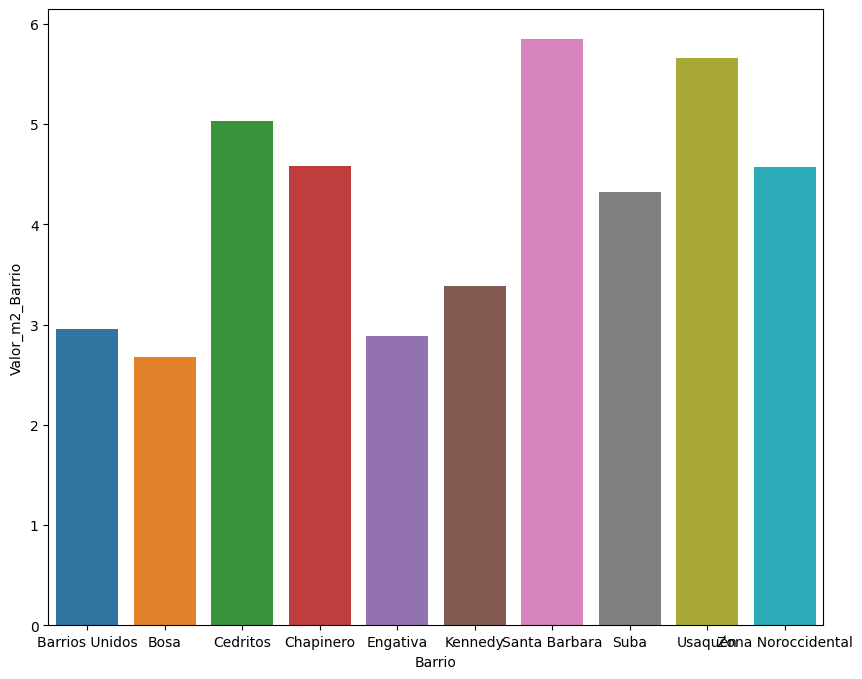

In [16]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Barrio',y='Valor_m2_Barrio',data=datos_barrio.query('Barrio in @top_barrios'))


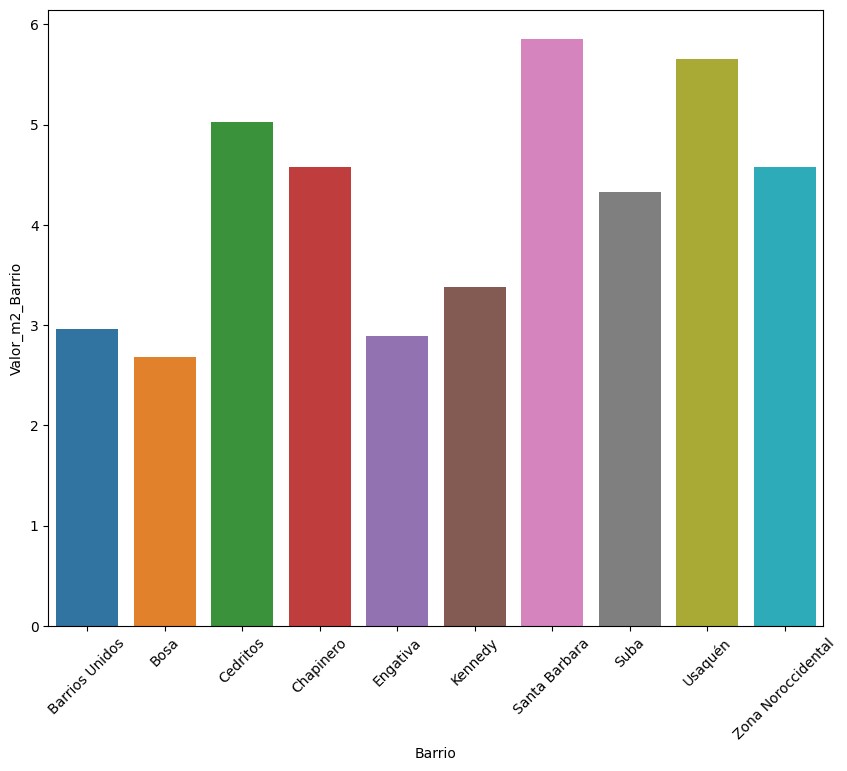

In [17]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Barrio',y='Valor_m2_Barrio',data=datos_barrio.query('Barrio in @top_barrios'))
ax.tick_params(axis='x',rotation=(45))#para los nombres

In [18]:
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.0,5.142857,4.572009
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.0,3.941176,3.403589
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.0,7.777778,8.104487
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.0,5.779221,5.655581
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.0,7.578125,6.290551


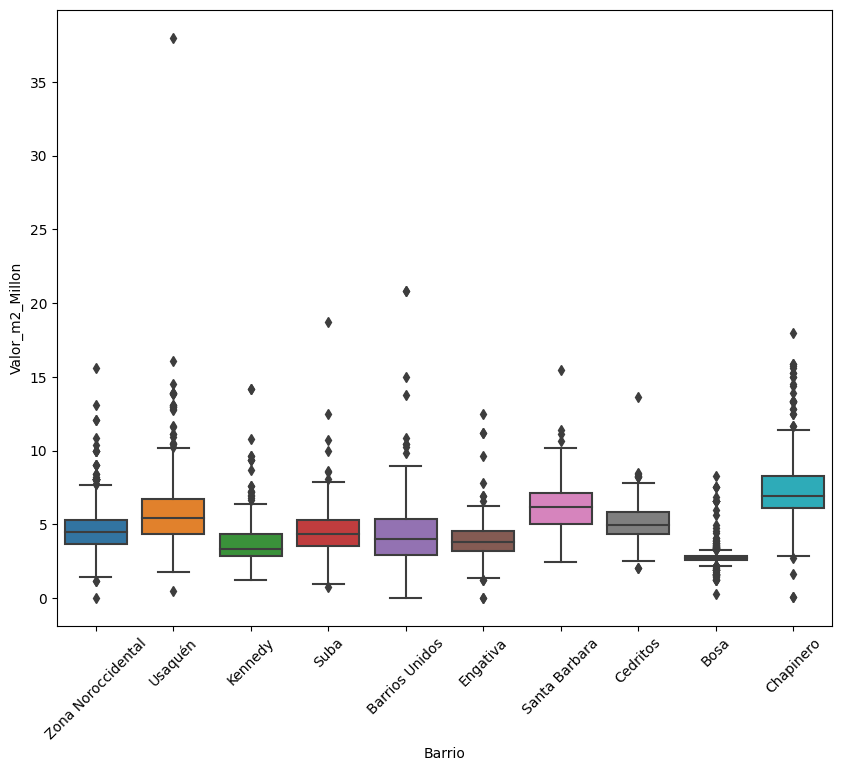

In [19]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x='Barrio',y='Valor_m2_Millon',data=inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x',rotation=(45))
plt.show()

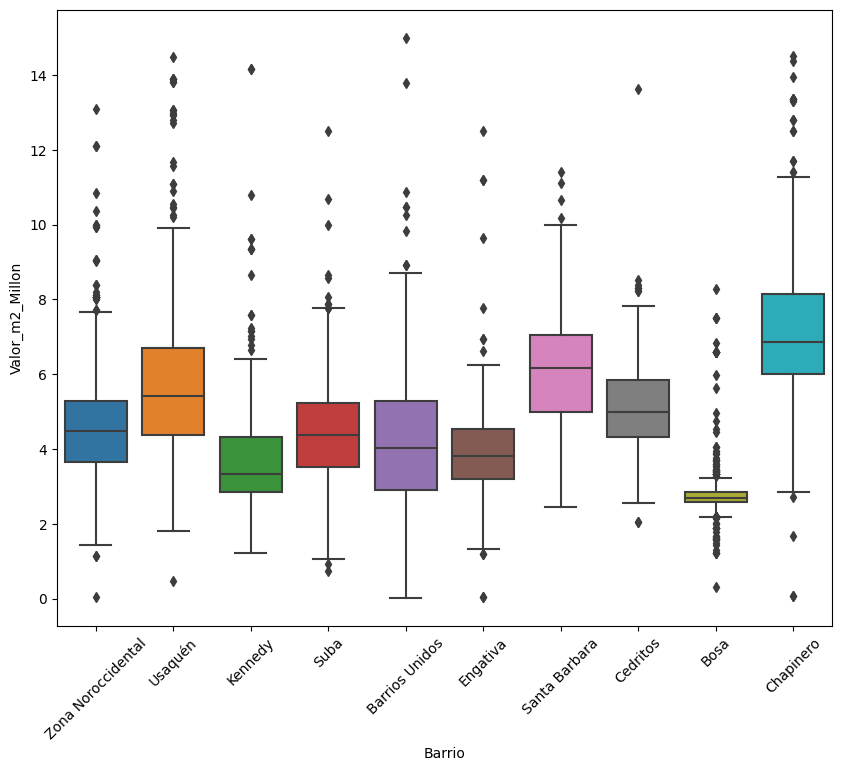

In [20]:
#Eliminanndo lo outliers
plt.figure(figsize=(10,8))
ax=sns.boxplot(x='Barrio',y='Valor_m2_Millon',data=inmuebles. query('Barrio in @top_barrios & Valor_m2_Millon < 15'))
ax.tick_params(axis='x',rotation=(45))
plt.show()

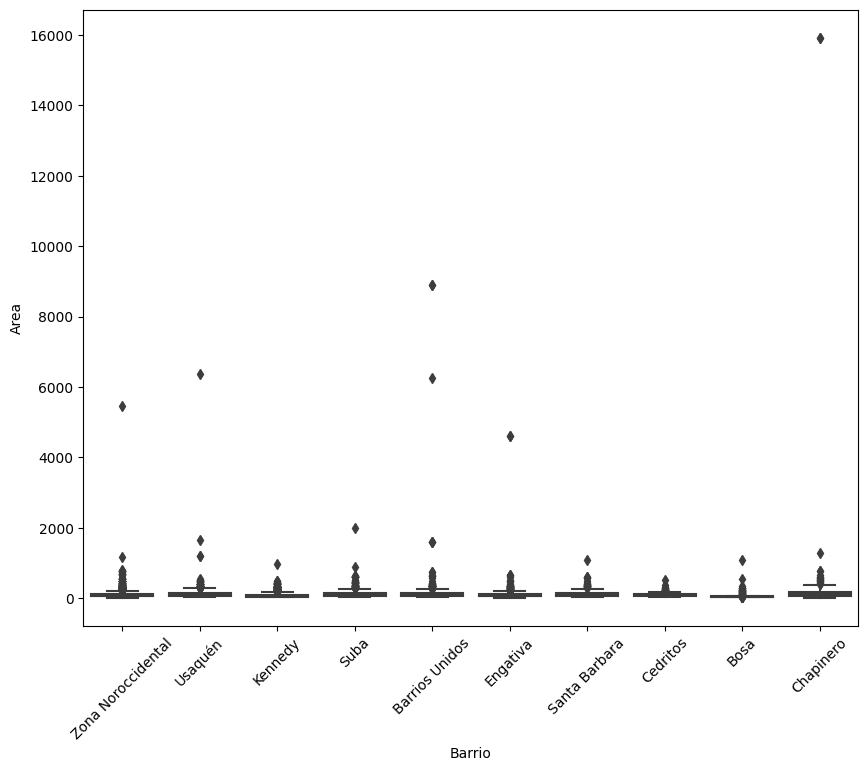

In [21]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x='Barrio',y='Area',data=inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x',rotation=(45))
plt.show()

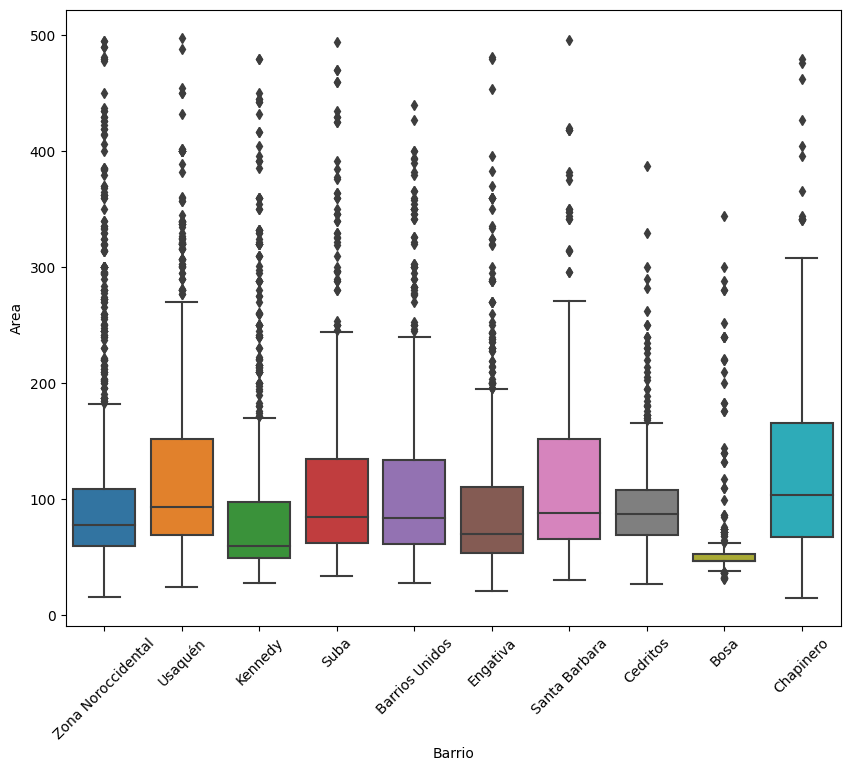

In [22]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x='Barrio',y='Area',data=inmuebles.query('Barrio in @top_barrios &Area <500'))
ax.tick_params(axis='x',rotation=(45))
plt.show()

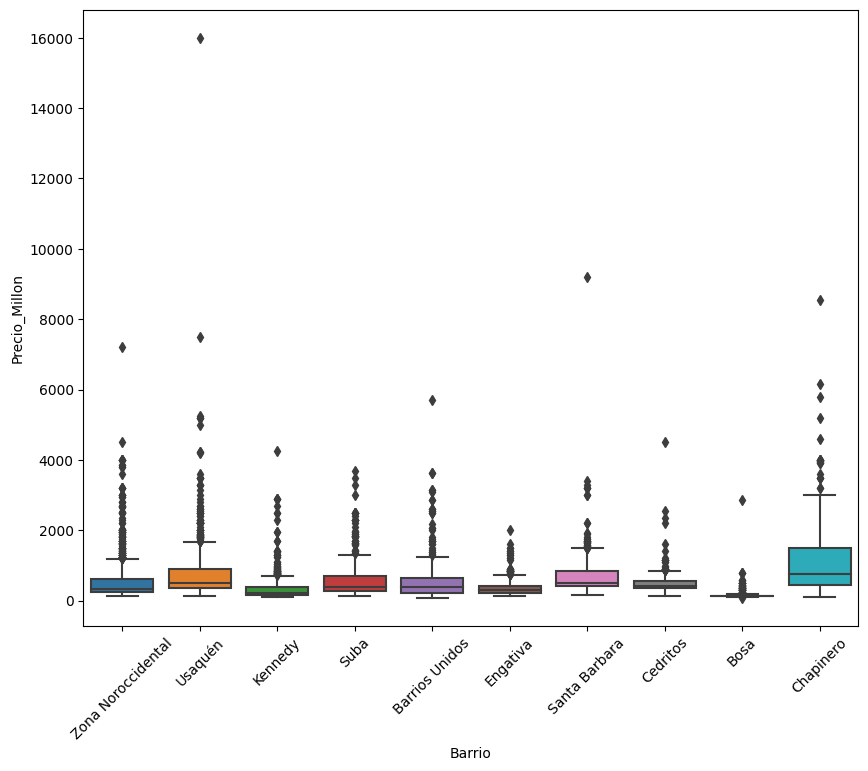

In [23]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x='Barrio',y='Precio_Millon',data=inmuebles.query('Barrio in @top_barrios'))
ax.tick_params(axis='x',rotation=(45))
plt.show()

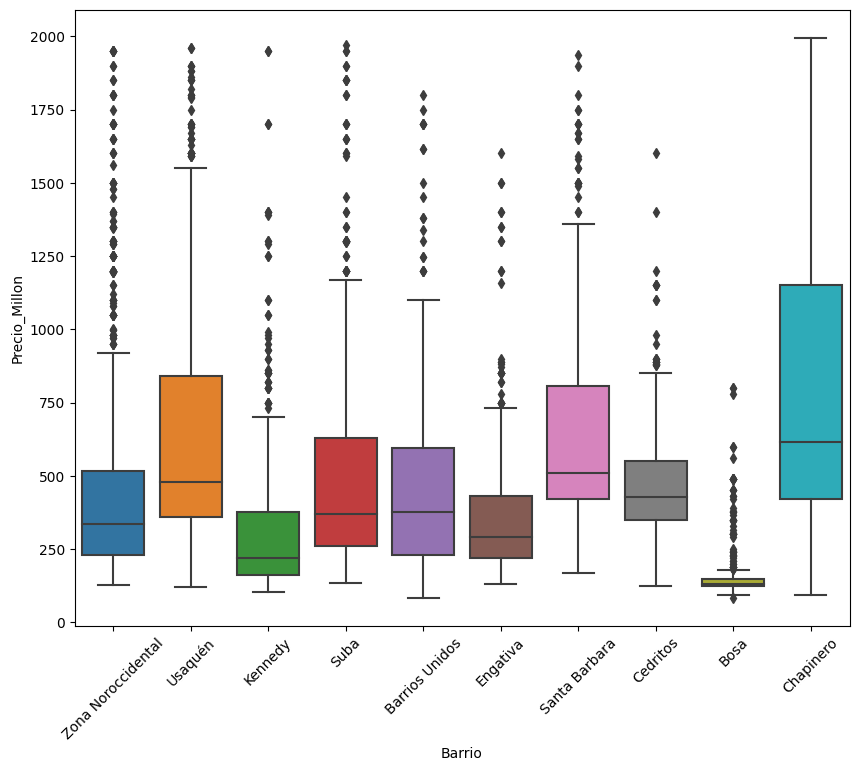

In [24]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x='Barrio',y='Precio_Millon',data=inmuebles.query('Barrio in @top_barrios & Precio_Millon <2000'))
ax.tick_params(axis='x',rotation=(45))
plt.show()

##EXTRAENDO DATOS DE DANE

In [25]:
datos_raw=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Identificación (Capítulo A).csv',sep=';',encoding='latin-1')
datos_raw #encoding el codigo en el que esta los datos

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.0,11,11001,1,14.0,Los Mártires,37.0,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.0,11,11001,1,1.0,Usaquén,803.0,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"
...,...,...,...,...,...,...,...,...,...,...,...
106462,3004341.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"6,40228287385068"
106463,3004342.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,2584046160819"
106464,3004343.0,11,11001,1,14.0,Los Mártires,37.0,Santa Isabel,11001162,Santa Isabel,"18,4708446737464"
106465,3004344.0,11,11001,1,3.0,Santa Fe,814.0,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"11,7560770541407"


In [26]:
 datos_raw.shape

(106467, 11)

In [27]:
#eliminamos la columna MPIO
datos_raw=datos_raw[datos_raw.MPIO==11001]
datos_raw.shape

(86504, 11)

In [28]:
datos_b=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Datos de la vivenda y su entorno (Capítulo B).csv',sep=';',encoding='latin-1')
datos_c=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
datos_e=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
datos_h=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Educación (Capítulo H).csv',sep=';',encoding='latin-1')
datos_l=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv',sep=';',encoding='latin-1')
datos_k=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Fuerza de trabajo (Capítulo K).csv',sep=';',encoding='latin-1')


<ipython-input-28-9b0b09db4f85>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
<ipython-input-28-9b0b09db4f85>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
<ipython-input-28-9b0b09db4f85>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h=pd.read_csv('/content/drive/MyDrive/CURSOS_Y_TALLERES_ETC/ALURA/archivos-dane/Educación (Capítulo H).csv',sep=';',encoding='latin-1')
<ipython-input-28-9b0b09db4f85>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mi

In [29]:
#fusion de datos
datos_dane=pd.merge(datos_raw,datos_b,on='DIRECTORIO',how='left')
datos_dane.shape

(86504, 73)

In [30]:
datos_dane=pd.merge(datos_dane,datos_c,on='DIRECTORIO',how='left')
datos_dane.shape

(87061, 214)

In [31]:
datos_dane=pd.merge(datos_dane,datos_e,on='DIRECTORIO',how='left')
datos_dane.shape

<ipython-input-31-64907094624e>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane=pd.merge(datos_dane,datos_e,on='DIRECTORIO',how='left')


(238559, 281)

In [34]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86504 entries, 0 to 86503
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        86504 non-null  float64
 1   DPTO              86504 non-null  int64  
 2   MPIO              86504 non-null  int64  
 3   CLASE             86504 non-null  int64  
 4   COD_LOCALIDAD     86504 non-null  float64
 5   NOMBRE_LOCALIDAD  86504 non-null  object 
 6   COD_UPZ_GRUPO     83736 non-null  float64
 7   NOMBRE_UPZ_GRUPO  83736 non-null  object 
 8   ESTRATO2021       86504 non-null  int64  
 9   NOMBRE_ESTRATO    86504 non-null  object 
 10  FEX_C_x           86504 non-null  object 
 11  NVCBP1            86504 non-null  int64  
 12  NVCBP2            78357 non-null  float64
 13  NVCBP3            86504 non-null  int64  
 14  NVCBP4            86504 non-null  int64  
 15  NVCBP5            86504 non-null  int64  
 16  NVCBP6            86504 non-null  int64 